# Team - NovaX # Model-X compettion


## 1. Data Loading and Filtering

To handle the large data set, here will not load the entire file into memory. Instead,try to use pandas to read only the specific non-medical columns that we want and will also simultaneously instruct pandas to recognize the special codes (-4, 8, 9)from the Data Dictionary as missing values(NaN) in nessasary columns
"

In [119]:
# main importings 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer

In [120]:
columns_needed = [
    # Target
    'DEMENTED',
    
    # (A) A1: Demographics
    'NACCAGE', 'SEX', 'NACCNIHR', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED',

    # (B) b1: Physical & A5: Lifestyle do the person usually do have these
    'HEIGHT', 'WEIGHT','VISION', 'VISCORR', 'HEARING', 'HEARAID','TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER',
    'ALCOCCAS', 'ALCFREQ', 'ALCOHOL','ABUSOTHR','APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
    
    # (C) A5: Health History do the person has this in past
    'CVHATT',      # Heart attack
    'CVAFIB',      # Atrial fibrillation
    'CBSTROKE',    # Stroke
    'CBTIA',       # Mini-stroke
    'PD',          # Parkinson's
    'SEIZURES',
    'NACCTBI',     # Traumatic Brain Injury
    'DIABETES',
    'HYPERTEN',
    'HYPERCHO',    # High cholesterol
    'B12DEF','THYROID','ARTHRIT',

    # (D) A5: Psychiatric History - person suffer from these
    'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV',

    # (E) A3: Family History -  what family members had
    'NACCFAM', 'NACCMOM', 'NACCDAD',

    # (F) A4: Medication
    'ANYMEDS', 'NACCAMD' # Total number of meds
]

## 2.Data cleaning and Preprocessing
#### filter the data and add NAN values to clean


In [121]:
file_path = 'Dementia Prediction Dataset.csv'

try:
    df = pd.read_csv(file_path, usecols=columns_needed)
    print("Data Loaded Successfully!")

    general_codes = [-4, 8, 9, 99]
    columns_to_clean_general = [
        'SEX', 'NACCNIHR', 'PRIMLANG', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED',
        'VISION', 'VISCORR', 'HEARING', 'HEARAID', 'TOBAC30', 'TOBAC100', 'ALCOCCAS', 'ALCFREQ',
        'ALCOHOL', 'ABUSOTHR', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
        'CVHATT', 'CVAFIB', 'CBSTROKE', 'CBTIA', 'PD', 'SEIZURES', 'NACCTBI',
        'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'ARTHRIT',
        'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV',
        'NACCFAM', 'NACCMOM', 'NACCDAD', 'ANYMEDS'
    ]
    # Deduplicate the list to avoid repeated cleaning operations (keeps first occurrence)
    columns_to_clean_general = list(dict.fromkeys(columns_to_clean_general))

    for col in columns_to_clean_general:
        if col in df.columns:
            df[col] = df[col].replace(general_codes, np.nan)

    # must treat these carefully to avoid deleting good data.
    # 'EDUC': 9 is valid, but -4 and 99 are missing. so we will ensure about it more
    if 'EDUC' in df.columns:
        df['EDUC'] = df['EDUC'].replace([-4, 99], np.nan)

    # 'SMOKYRS': 9 is valid, but -4, 88, and 99 are missing.
    if 'SMOKYRS' in df.columns:
        df['SMOKYRS'] = df['SMOKYRS'].replace([-4, 88, 99], np.nan)

    # 'PACKSPER': 4 is valid, but -4, 8, and 9 are missing.
    if 'PACKSPER' in df.columns:
        df['PACKSPER'] = df['PACKSPER'].replace([-4, 8, 9], np.nan)

    # 'HEIGHT', 'WEIGHT', 'NACCAMD': 8, 9, 99 are "Unknown"
    # These are numerical, but 8 or 9 are not valid measures.
    if 'HEIGHT' in df.columns:
        df['HEIGHT'] = df['HEIGHT'].replace([-4, 8, 9, 99], np.nan)
    if 'WEIGHT' in df.columns:
        df['WEIGHT'] = df['WEIGHT'].replace([-4, 8, 9, 99], np.nan)
    if 'NACCAMD' in df.columns:
        df['NACCAMD'] = df['NACCAMD'].replace([-4, 8, 9, 99], np.nan)

    # 'NACCAGE' is assumed to be clean (no special codes there)

    # get the summary
    df.info()

except FileNotFoundError:
    print(f"File not found.")
except ValueError as e:
    print(f" A problem occurred with the columns. {e}")


Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       195196 non-null  int64  
 1   PRIMLANG  192164 non-null  float64
 2   EDUC      194222 non-null  float64
 3   MARISTAT  194300 non-null  float64
 4   NACCLIVS  194872 non-null  float64
 5   INDEPEND  194599 non-null  float64
 6   RESIDENC  192318 non-null  float64
 7   HANDED    194164 non-null  float64
 8   NACCFAM   177430 non-null  float64
 9   NACCMOM   189004 non-null  float64
 10  NACCDAD   186937 non-null  float64
 11  ANYMEDS   192457 non-null  float64
 12  TOBAC30   123036 non-null  float64
 13  TOBAC100  122272 non-null  float64
 14  SMOKYRS   119634 non-null  float64
 15  PACKSPER  119730 non-null  float64
 16  ALCOCCAS  19326 non-null   float64
 17  ALCFREQ   12241 non-null   float64
 18  CVHATT    123136 non-null  float64
 19  CVAFIB    122935 n

## 3.Get the special data rows that we want to train the model B

In [122]:
# --- Model B Strategy: Filter for specialist data rows ---

# setting the threshold to 30,000
min_data_threshold = 30000

# 1. Find the 'specialist' columns (the ones with < 30,000 data)
specialist_columns = df.columns[df.count() < min_data_threshold]

# 2. Get the rows where at least one of these specialist columns is not null
# .dropna(subset=..., how = 'all') drops rows where ALL specialist columns are NaN.
original_rows = df.shape[0]
df_model_B = df.dropna(subset=specialist_columns, how='all').copy()

print(f"Original dataset had {original_rows} rows.")
print(f"Filtered dataset has {df_model_B.shape[0]} rows.")
print(f"Dropped {original_rows - df_model_B.shape[0]} rows that lacked specialist data.")

df = df_model_B  # Now df contains only the rows for Model B training
df.info()

Original dataset had 195196 rows.
Filtered dataset has 19604 rows.
Dropped 175592 rows that lacked specialist data.
<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  int64  
 1   PRIMLANG  19254 non-null  float64
 2   EDUC      19458 non-null  float64
 3   MARISTAT  19460 non-null  float64
 4   NACCLIVS  19492 non-null  float64
 5   INDEPEND  19392 non-null  float64
 6   RESIDENC  19455 non-null  float64
 7   HANDED    19364 non-null  float64
 8   NACCFAM   16534 non-null  float64
 9   NACCMOM   19360 non-null  float64
 10  NACCDAD   19360 non-null  float64
 11  ANYMEDS   19347 non-null  float64
 12  TOBAC30   19474 non-null  float64
 13  TOBAC100  19257 non-null  float64
 14  SMOKYRS   18865 non-null  float64
 15  PACKSPER  18965 non-null  float64
 16  ALCOCCAS  19326 non-null  float64
 17  ALCFREQ   12241 non-null  float64

#### remove duplicates if any exist

In [123]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(4)

In [124]:
# there are duplicates
df_base_model=df.drop_duplicates()
df_base_model.shape

(19600, 55)

##### Impute Missing Tobacco Data

As we discussed, we cannot blindly fill all NaNs in SMOKYRS (Years Smoked) with 0. There are two types of NaNs:

Logical NaNs: TOBAC100 = 0 (No), so SMOKYRS is skipped. These should be 0.

True Missing NaNs: TOBAC100 = 1 (Yes), but the person forgot to answer SMOKYRS. These should not be 0.

we will only fill the "Logical NaNs" (Case 1). The "True Missing NaNs" (Case 2) will be handled later in our general imputation step (use with the median or most appropriate value).

In [125]:
# We assume if it's missing, they are likely a non-smoker (0).
if 'TOBAC100' in df.columns:
    df['TOBAC100'] = df['TOBAC100'].fillna(0)

In [126]:
# Now, apply the conditional logic
# Condition:- Where TOBAC100 is 0 as NO
condition_non_smoker = (df['TOBAC100'] == 0)
tobacco_cols_to_fill = ['SMOKYRS', 'PACKSPER', 'TOBAC30']

for col in tobacco_cols_to_fill:
    if col in df.columns:
        # We fill NaNs with 0 ONLY for the rows that meet the condition
        df.loc[condition_non_smoker, col] = df.loc[condition_non_smoker, col].fillna(0)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       19604 non-null  int64  
 1   PRIMLANG  19254 non-null  float64
 2   EDUC      19458 non-null  float64
 3   MARISTAT  19460 non-null  float64
 4   NACCLIVS  19492 non-null  float64
 5   INDEPEND  19392 non-null  float64
 6   RESIDENC  19455 non-null  float64
 7   HANDED    19364 non-null  float64
 8   NACCFAM   16534 non-null  float64
 9   NACCMOM   19360 non-null  float64
 10  NACCDAD   19360 non-null  float64
 11  ANYMEDS   19347 non-null  float64
 12  TOBAC30   19597 non-null  float64
 13  TOBAC100  19604 non-null  float64
 14  SMOKYRS   19212 non-null  float64
 15  PACKSPER  19312 non-null  float64
 16  ALCOCCAS  19326 non-null  float64
 17  ALCFREQ   12241 non-null  float64
 18  CVHATT    19526 non-null  float64
 19  CVAFIB    19449 non-null  float64
 20  CBSTROKE  19510 non-null  float6

In [128]:
df.isnull().sum()

SEX            0
PRIMLANG     350
EDUC         146
MARISTAT     144
NACCLIVS     112
INDEPEND     212
RESIDENC     149
HANDED       240
NACCFAM     3070
NACCMOM      244
NACCDAD      244
ANYMEDS      257
TOBAC30        7
TOBAC100       0
SMOKYRS      392
PACKSPER     292
ALCOCCAS     278
ALCFREQ     7363
CVHATT        78
CVAFIB       155
CBSTROKE      94
CBTIA        213
PD            95
SEIZURES     131
NACCTBI      229
DIABETES      83
HYPERTEN      89
HYPERCHO     204
B12DEF       723
THYROID      265
ARTHRIT      200
APNEA        738
RBD          536
INSOMN       176
OTHSLEEP     264
ALCOHOL      137
ABUSOTHR     128
PTSD         193
BIPOLAR      114
SCHIZ         95
DEP2YRS      329
DEPOTHR      600
ANXIETY      184
OCD          186
NPSYDEV      244
HEIGHT       718
WEIGHT       736
VISION       846
VISCORR      833
HEARING      735
HEARAID      697
DEMENTED       0
NACCNIHR     449
NACCAGE        0
NACCAMD     2929
dtype: int64

#### use Feature engineering technique to shortage the columns furthermrore
use BMI instead of height,weight

We will:
- Calculate BMI using the formula: BMI = Weight (kg) / Height (m)^2
- Convert our units (inches to meters, lbs to kg).
- Create the new BMI column.Drop the original HEIGHT and WEIGHT columns to simplify our dataset

In [129]:
height = df['HEIGHT']* 0.0254  # 1 inch = 0.0254 m
weight = df['WEIGHT']* 0.453592 # 1 lb = 0.453592 kg

df['BMI'] = weight/(height**2)
df['BMI'] = df['BMI'].replace([np.inf,-np.inf],np.nan)

In [130]:
df['BMI']

0         32.357074
2         23.734004
3         79.174438
4         18.970383
5         22.142511
            ...    
195150    24.799612
195158    21.613616
195175    21.521190
195186    14.354825
195195    26.660474
Name: BMI, Length: 19604, dtype: float64

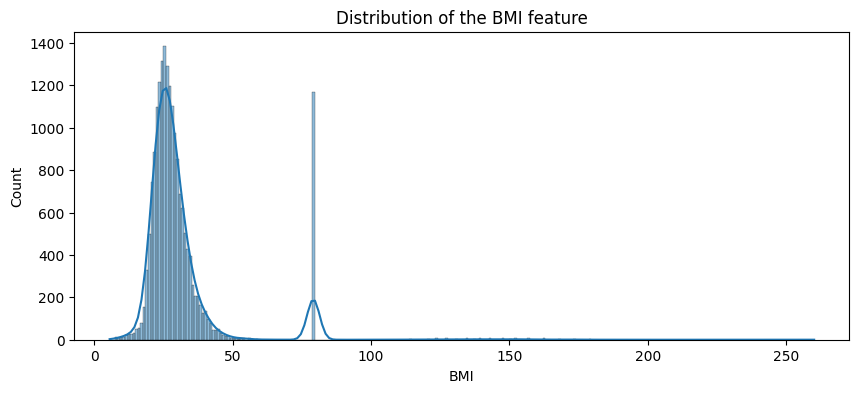

In [131]:
# look at the distribution of the BMI feature
plt.figure(figsize=(10,4))
sns.histplot(df['BMI'].dropna(),kde=True)
plt.title('Distribution of the BMI feature')
plt.show()

We will:

- Plot a boxplot of the original (dirty) BMI data to visually confirm the data entry errors.

- Define a plausible BMI range (15 to 55) and set all values outside it to NaN.

- Plot a second boxplot of the cleaned BMI data to confirm the outliers were successfully removed.

<Axes: xlabel='BMI'>

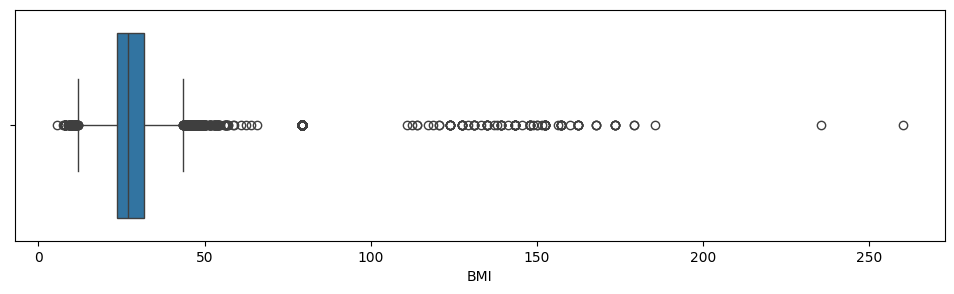

In [132]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['BMI'])
# before cleaning

In [133]:
# define our plasusible BMI range to 15 - 55 and will clean others
min_bmi = 15
max_bmi = 55


df.loc[(df['BMI']<min_bmi) | (df['BMI']>max_bmi), 'BMI'] = np.nan

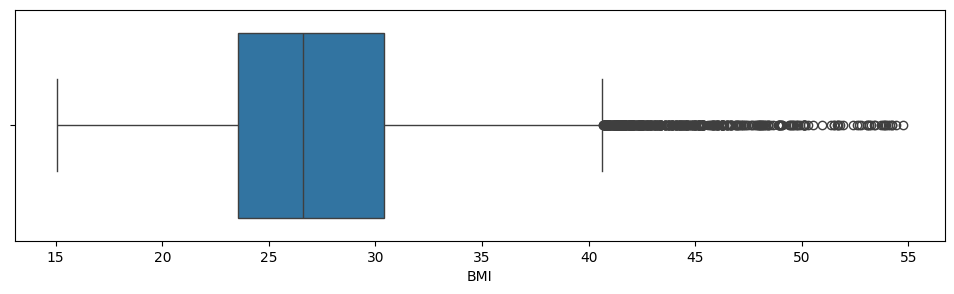

In [134]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['BMI'].dropna())
plt.show()

boxplots for each of our main numerical features to quickly check their quality

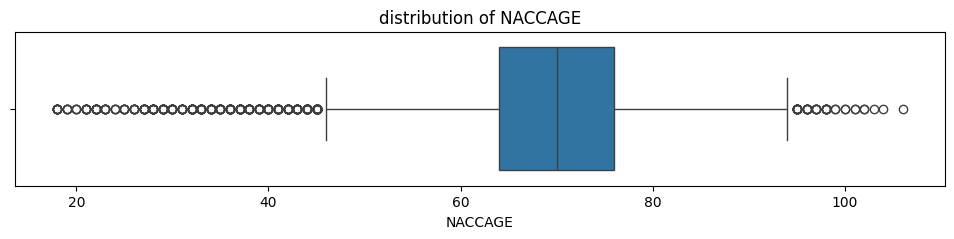

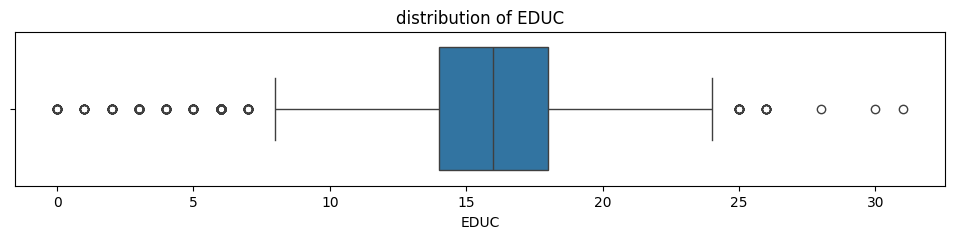

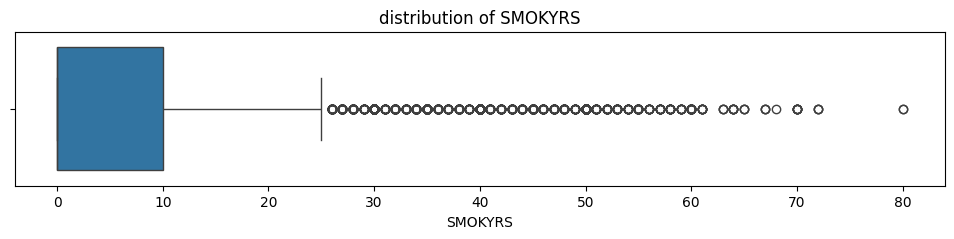

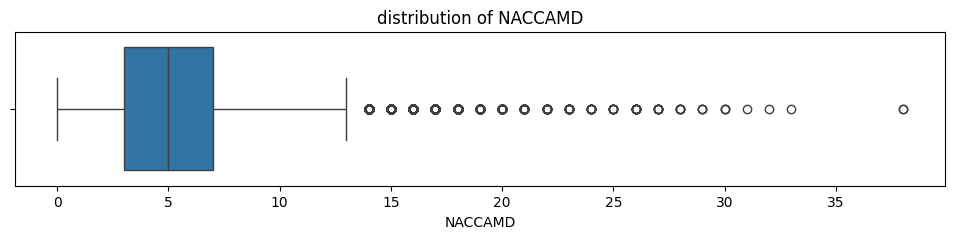

In [135]:
numerical_features_to_check = ['NACCAGE', 'EDUC', 'SMOKYRS', 'NACCAMD']

for col in numerical_features_to_check:
    if col in df.columns:
        plt.figure(figsize=(12,2))
        sns.boxplot(x=df[col].dropna())
        plt.title(f'distribution of {col}')
        plt.xlabel(col)
        plt.show()

lets find is they any not valid in numerical

In [136]:
# allowablew range 18-120 in there
count_outliers1 = df['NACCAGE'][df['NACCAGE']>120].count()
# df.loc[df['NACCAGE']>100, 'NACCAGE'] = np.nan 
count_outliers1

np.int64(0)

In [137]:
count_outliers2 = df['EDUC'][df['EDUC']>36].count()
count_outliers2

np.int64(0)

In [138]:

df['PACKSPER'] = df['PACKSPER'].replace([-4, 8, 9], np.nan)
    
#logical errors (any value > 5)
count_outliers = df['PACKSPER'][df['PACKSPER'] > 5].count()
count_outliers

np.int64(0)

now we look at the target varible - DEMENTED to find impbalancing

In [139]:
df['DEMENTED']

0         0
2         0
3         1
4         0
5         0
         ..
195150    0
195158    0
195175    0
195186    0
195195    0
Name: DEMENTED, Length: 19604, dtype: int64

In [140]:
target_counts = df['DEMENTED'].value_counts()
target_counts

DEMENTED
0    14781
1     4823
Name: count, dtype: int64

In [141]:
df['DEMENTED'].value_counts(normalize=True) * 100

DEMENTED
0    75.397878
1    24.602122
Name: proportion, dtype: float64

can be seen some unbalanced here

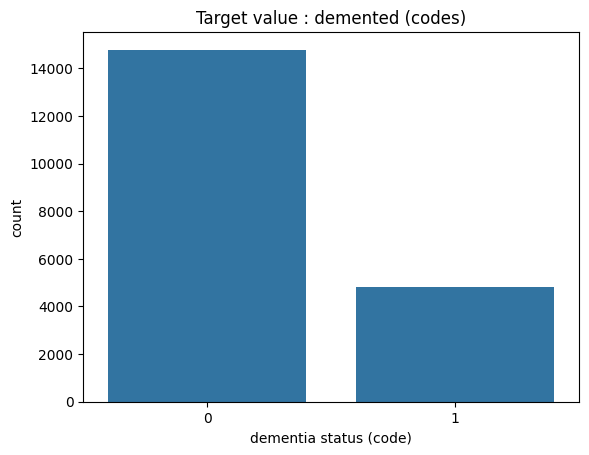

In [142]:
# Plot target counts safely using actual label values
sns.countplot(x='DEMENTED', data = df_base_model)
plt.title('Target value : demented (codes)')
plt.ylabel('count')
plt.xlabel('dementia status (code)')
# Use the actual unique codes present in the data for tick positions (safer than hard-coding)
unique_vals = sorted(df_base_model['DEMENTED'].dropna().unique().tolist())
plt.xticks(unique_vals)
plt.show()


The 75/25 split is "moderately imbalanced". If we train on it, the model will be biased.so we will do Oversampling teqnique like SMOTE is to perfect solution to get to 50/50.But, before it follow one very important thing to prevent data leakage:First, we must clean all NaN values and then we will split our data into a train set and a test set.after will apply SMOTE only to the train set.


#### next fill numerical NaNs(like BMI, EDUC) with their column's Median value  or use KNN method. Fill categorical NaNs (like MARISTAT, DIABETES) with their column's Mode

In [143]:
df_simple_imputed = df.copy()

In [144]:
# true_numerical = ['NACCAGE','EDUC','SMOKYRS']

### cleaning special features 

In [145]:
# --- CLEANING: sanitize special features and remove outliers ---
features_to_clean = [
    'ALCOCCAS', 'ALCFREQ', 'ARTHRIT', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
    'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'NPSYDEV'
]
# Common sentinel codes observed in dataset (treat as NaN)
sentinels = [-4, 8, 9, 99, 88, 888, 999]

for col in features_to_clean:
    if col not in df.columns:
        print(f"Skipping missing column: {col}")
        continue

    print(f"--- Cleaning column: {col} ---")
    # snapshot before cleaning
    before = df[col].value_counts(dropna=False).head(20)

    # Replace well-known sentinel codes with NaN
    df[col] = df[col].replace(sentinels, np.nan)

    # Ensure numeric where possible (coerce errors to NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # If the column looks categorical/binary (values within 0-2), keep only those values
    non_na_vals = df[col].dropna().unique()
    allowed_small_set = {0, 1, 2}
    if set(non_na_vals).issubset(allowed_small_set):
        df.loc[~df[col].isin(allowed_small_set), col] = np.nan
    else:
        # Numeric column: remove extreme outliers using a high z-score threshold (|z|>4)
        vals = df[col]
        if vals.dropna().shape[0] > 10:
            z = (vals - vals.mean()) / vals.std(ddof=0)
            df.loc[z.abs() > 4, col] = np.nan

    # snapshot after cleaning
    after = df[col].value_counts(dropna=False).head(20)
    print('Before (top values):')
    print(before.to_string())
    print('After (top values):')
    print(after.to_string())
    print('-' * 70)

print('✅ Finished cleaning listed features. These cleaned columns will be used by the imputation step.')

--- Cleaning column: ALCOCCAS ---
Before (top values):
ALCOCCAS
1.0    12312
0.0     7014
NaN      278
After (top values):
ALCOCCAS
1.0    12312
0.0     7014
NaN      278
----------------------------------------------------------------------
--- Cleaning column: ALCFREQ ---
Before (top values):
ALCFREQ
NaN    7363
3.0    3101
4.0    2953
2.0    2367
1.0    1986
0.0    1834
After (top values):
ALCFREQ
NaN    7363
3.0    3101
4.0    2953
2.0    2367
1.0    1986
0.0    1834
----------------------------------------------------------------------
--- Cleaning column: ARTHRIT ---
Before (top values):
ARTHRIT
0.0    9823
1.0    9355
2.0     226
NaN     200
After (top values):
ARTHRIT
0.0    9823
1.0    9355
2.0     226
NaN     200
----------------------------------------------------------------------
--- Cleaning column: APNEA ---
Before (top values):
APNEA
0.0    14884
1.0     3687
NaN      738
2.0      295
After (top values):
APNEA
0.0    14884
1.0     3687
NaN      738
2.0      295
--------

In [146]:
# --- PRESERVE MISSINGNESS & DIAGNOSTICS FOR SPECIAL FEATURES ---
special_features = [
    'ALCOCCAS', 'ALCFREQ', 'ARTHRIT', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
    'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'NPSYDEV'
]

# Keep only those present in the DataFrame
special_existing = [c for c in special_features if c in df.columns]
print(f"Special features present: {special_existing}")

# Add missing-indicator columns to preserve information about originally-missing values
for c in special_existing:
    miss_col = f"{c}_missing"
    if miss_col not in df.columns:
        df[miss_col] = df[c].isnull().astype(int)

print('\nAdded missing-indicator columns for special features (if any were missing).')

# Diagnostics summary for all columns we plan to use
cols = [c for c in columns_needed if c in df.columns]
summary = []
for c in cols:
    pct_missing = df[c].isnull().mean() * 100
    dtype = df[c].dtype
    unique_sample = df[c].dropna().unique()[:5].tolist()
    summary.append((c, str(dtype), round(pct_missing,2), unique_sample))

import pandas as _pd
diag_df = _pd.DataFrame(summary, columns=['column','dtype','missing_pct','sample_values'])
print('\nDiagnostics (columns, dtype, missing%):')
print(diag_df.sort_values('missing_pct', ascending=False).to_string(index=False))

# Show top 10 columns by missing%
print('\nTop columns by missing%:')
print(diag_df.sort_values('missing_pct', ascending=False).head(10).to_string(index=False))


Special features present: ['ALCOCCAS', 'ALCFREQ', 'ARTHRIT', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP', 'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'NPSYDEV']

Added missing-indicator columns for special features (if any were missing).

Diagnostics (columns, dtype, missing%):
  column   dtype  missing_pct                       sample_values
 ALCFREQ float64        37.56           [2.0, 4.0, 0.0, 3.0, 1.0]
 NACCFAM float64        15.66                          [1.0, 0.0]
 NACCAMD float64        14.94         [13.0, 4.0, 3.0, 1.0, 10.0]
  VISION float64         4.32                          [0.0, 1.0]
 VISCORR float64         4.25                          [1.0, 0.0]
   APNEA float64         3.76                     [0.0, 1.0, 2.0]
  WEIGHT float64         3.75 [232.0, 175.0, 888.0, 114.0, 125.0]
 HEARING float64         3.75                          [1.0, 0.0]
  B12DEF float64         3.69                     [0.0, 2.0, 1.0]
  HEIGHT float64         3.66      [71.0, 72.0, 88.8, 65.0, 63.0]


In [147]:
# --- MODE IMPUTATION: fill special categorical NaNs with the column mode ---
# Uses `special_existing` created earlier when preserving missingness
if 'special_existing' not in globals():
    special_existing = [c for c in ['ALCOCCAS','ALCFREQ','ARTHRIT','APNEA','RBD','INSOMN','OTHSLEEP','PTSD','BIPOLAR','SCHIZ','ANXIETY','OCD','NPSYDEV'] if c in df.columns]

print(f"Mode-imputing these special categorical features: {special_existing}")

for c in special_existing:
    mode_series = df[c].mode(dropna=True)
    if mode_series.empty:
        print(f" - {c}: no non-null values found, skipping mode imputation")
        continue
    mode_val = mode_series.iloc[0]
    df[c] = df[c].fillna(mode_val)
    print(f" - {c}: filled NaNs with mode = {mode_val}")

print('✅ Completed mode imputation for special categorical features.')


Mode-imputing these special categorical features: ['ALCOCCAS', 'ALCFREQ', 'ARTHRIT', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP', 'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'NPSYDEV']
 - ALCOCCAS: filled NaNs with mode = 1.0
 - ALCFREQ: filled NaNs with mode = 3.0
 - ARTHRIT: filled NaNs with mode = 0.0
 - APNEA: filled NaNs with mode = 0.0
 - RBD: filled NaNs with mode = 0.0
 - INSOMN: filled NaNs with mode = 0.0
 - OTHSLEEP: filled NaNs with mode = 0.0
 - PTSD: filled NaNs with mode = 0.0
 - BIPOLAR: filled NaNs with mode = 0.0
 - SCHIZ: filled NaNs with mode = 0.0
 - ANXIETY: filled NaNs with mode = 0.0
 - OCD: filled NaNs with mode = 0.0
 - NPSYDEV: filled NaNs with mode = 0.0
✅ Completed mode imputation for special categorical features.


In [148]:
df_knn_imputed = df.copy()

# identify feature types
true_numerical = ['NACCAGE', 'EDUC', 'SMOKYRS', 'PACKSPER', 'NACCAMD', 'BMI']
all_features = [c for c in df.columns if c != 'DEMENTED']

# If `special_existing` list is present (we added missing-indicators earlier), exclude those from the global categorical imputer
if 'special_existing' not in globals():
    special_existing = [c for c in ['ALCOCCAS','ALCFREQ','ARTHRIT','APNEA','RBD','INSOMN','OTHSLEEP','PTSD','BIPOLAR','SCHIZ','ANXIETY','OCD','NPSYDEV'] if c in df.columns]

# Exclude special features because we already mode-imputed them above
true_categorical = [col for col in all_features if col not in true_numerical and col not in special_existing]

# k=5 is the hyperparameter (number of neighbors)
knn_imputer = KNNImputer(n_neighbors=5) 
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the Imputers (Mixed Strategy)
if len(true_categorical) > 0:
    df_knn_imputed[true_categorical] = cat_imputer.fit_transform(df_knn_imputed[true_categorical])
else:
    print('No categorical columns to impute with SimpleImputer after excluding special features.')

if len(true_numerical) > 0:
    df_knn_imputed[true_numerical] = knn_imputer.fit_transform(df_knn_imputed[true_numerical])

print("✅ Successfully created 'df_knn_imputed'!")

df_knn_imputed.info()


✅ Successfully created 'df_knn_imputed'!
<class 'pandas.core.frame.DataFrame'>
Index: 19604 entries, 0 to 195195
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               19604 non-null  float64
 1   PRIMLANG          19604 non-null  float64
 2   EDUC              19604 non-null  float64
 3   MARISTAT          19604 non-null  float64
 4   NACCLIVS          19604 non-null  float64
 5   INDEPEND          19604 non-null  float64
 6   RESIDENC          19604 non-null  float64
 7   HANDED            19604 non-null  float64
 8   NACCFAM           19604 non-null  float64
 9   NACCMOM           19604 non-null  float64
 10  NACCDAD           19604 non-null  float64
 11  ANYMEDS           19604 non-null  float64
 12  TOBAC30           19604 non-null  float64
 13  TOBAC100          19604 non-null  float64
 14  SMOKYRS           19604 non-null  float64
 15  PACKSPER          19604 non-null  float64
 16  ALC

##### save the file for after use beacuse there is lot of time consuming

In [149]:
output_filename = 'df_clean_knn_imputed_model_B.csv'
# write the cleaned/imputed dataframe to CSV
df_knn_imputed.to_csv(output_filename, index=False)

# If you want to read the file back into a DataFrame use the correct pandas API:
df_knn_imputed = pd.read_csv(output_filename)


#### Visualizing Numerical Feature Distributions vs DEMENTED

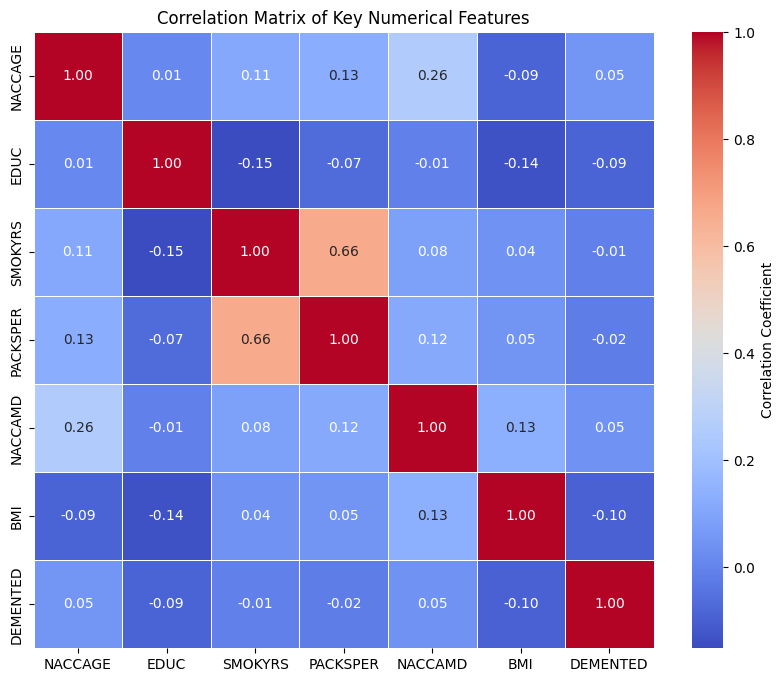

In [150]:
# We use the DataFrame without NaN values
df_copy = df_knn_imputed.copy()

# Select ONLY the numerical features
numerical_features_to_check = [
    'NACCAGE', 'EDUC', 'SMOKYRS', 'PACKSPER', 'NACCAMD', 'BMI', 'DEMENTED' # Also include the target for context
]
df_corr = df_copy[numerical_features_to_check]

#Calculate the Correlation Matrix
correlation_matrix = df_corr.corr()


plt.figure(figsize=(10, 8))
# Use annot=True to show the numbers, fmt='.2f' to show 2 decimal places
sns.heatmap(correlation_matrix, 
    annot=True, cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5,cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()


as see except PACKSPER,SMOKYRS others are not highly corelated and because of anything is not above 0.8 no need to reduce or change any but we'll add a new feature with this 0.66 correlated features

### add a new feature  - Feature Engineering
SMOKYRS × PACKSPER ==> PACKYRS (packes per year)

In [151]:
# We use the KNN imputed dataframe (df_knn_imputed)
# Formula: Pack-Years = SMOKYRS × PACKSPER
df_knn_imputed['PACKYRS'] = df_knn_imputed['SMOKYRS'] * df_knn_imputed['PACKSPER']

df_knn_imputed[['SMOKYRS', 'PACKSPER', 'PACKYRS']].tail()

,SMOKYRS,PACKSPER,PACKYRS
19599,0.0,0.0,0.0
19600,0.0,0.0,0.0
19601,0.0,0.0,0.0
19602,0.0,0.0,0.0
19603,0.0,0.0,0.0


In [152]:
df_knn_imputed.shape

(19604, 70)

In [153]:
df_knn_imputed.drop(['SMOKYRS', 'PACKSPER'], axis=1, inplace=True)

In [154]:
df_knn_imputed.shape

(19604, 68)